# Hyper-Parameter tunning in scikit-learn

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Data preparation

In [2]:
# importing data
data_path= '../data/diamonds.csv'
diamonds = pd.read_csv(data_path)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)

### Preparing objects for modelling

In [3]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
target_name = 'price'
robust_scaler = RobustScaler()
X = diamonds.drop('price', axis=1)
X = robust_scaler.fit_transform(X)
y = diamonds[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

### Defining the tuning grid

* **n_estimators**: The number of trees in the forest.

* **max_features**: The number of features to consider when looking for the best split. Posible choices: n_features, sqrt(n_features), log2(n_features).
    
* **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Model we have been using:

RandomForestRegressor(n_estimators=50, max_depth=16, max_features= 'auto', random_state=55, n_jobs=-1)

In [4]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=55, n_jobs=-1)

In [5]:
parameter_grid = {'n_estimators': [25,50,75,100], 
                  'max_depth': [10,15,20,30],
                  'max_features': ['auto','sqrt']}

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
RF_classifier = GridSearchCV(estimator=RF, param_grid=parameter_grid, refit=True,
                             scoring='mean_squared_error', cv=10, n_jobs=-1)

RF_classifier.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=55, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 75, 100], 'max_depth': [10, 15, 20, 30], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [8]:
results = pd.DataFrame(RF_classifier.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.513492,1.439769,-634506.134927,-528058.000445,10,auto,25,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",28,-600562.181563,...,-710733.098256,-520676.506538,-657396.630228,-527250.180210,-604578.254796,-535850.704908,1.276463,2.135683,39060.310713,5850.430293
1,7.872935,1.502697,-627471.180849,-522750.323802,10,auto,50,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",27,-593561.253732,...,-702352.894534,-514821.984959,-646546.519124,-524044.816161,-596190.433193,-527958.066721,1.049025,1.491461,36225.179033,5743.402609
2,10.642504,2.227475,-625250.042255,-520297.873599,10,auto,75,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",26,-595222.201695,...,-702992.782973,-514285.005215,-650177.661258,-526179.198296,-598802.436150,-526941.510860,1.332777,1.391471,37305.145410,5537.339700
3,13.102797,1.598602,-622589.325370,-517914.197711,10,auto,100,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",25,-593548.336459,...,-700469.451490,-513510.695907,-647467.409274,-522857.509825,-594634.813997,-524046.291247,2.491238,0.796870,36535.205029,4527.169243
4,2.363837,0.955541,-810008.883519,-695999.613338,10,sqrt,25,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",32,-749154.479786,...,-869282.771152,-685704.718933,-772334.624101,-693883.214921,-763710.176465,-692217.528111,1.158970,0.878415,37897.304723,10082.249043


In [10]:
RF_classifier.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}

In [12]:
RF_classifier.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=55, verbose=0, warm_start=False)

## Comparing the best model from grid search with our last model using the test set

In [13]:
## Random Forests
RF_model1 = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=123, n_jobs=-1)
RF_model1.fit(X_train, y_train)
RF_model1_test_mse = mean_squared_error(y_pred=RF_model1.predict(X_test), y_true=y_test)

## Random Forest with tunned parameters 
RF_tunned_test_mse = mean_squared_error(y_pred=RF_classifier.predict(X_test), y_true=y_test)

In [14]:
mse_models = pd.Series({'Not Tunned': RF_model1_test_mse, 'Tunned Model':RF_tunned_test_mse})

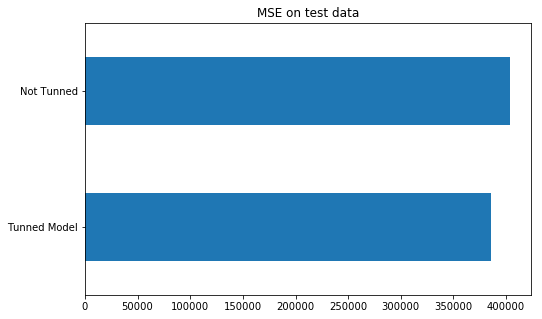

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
mse_models.sort_values().plot(kind='barh', ax=ax)
ax.set_title('MSE on test data');

In [16]:
100*(RF_tunned_test_mse-RF_model1_test_mse)/RF_model1_test_mse

-4.580267005058392

### Excercise: tune the hyper-parameters of the credit card default dataset